# Imports

In [ ]:
import matplotlib.pyplot as plt       # Used For Data Visualization
import pandas as pd                   # Used For Tabular Data
import numpy as np                    # Used For Vector Operations
import statistics as st               # Used For Statistical Analysis
import math                           # Used For Mathematical Manipulation

# Retreive and Clean Data

In [ ]:
salary_df = pd.read_csv('/content/Salary_Data.csv.xls')
salary_df = salary_df.sample(frac=1)
salary_df

,YearsExperience,Salary
11,4.0,55794.0
27,9.6,112635.0
5,2.9,56642.0
18,5.9,81363.0
1,1.3,46205.0
7,3.2,54445.0
9,3.7,57189.0
2,1.5,37731.0
4,2.2,39891.0
22,7.9,101302.0


# Data Split

In [ ]:
train, valid, test = np.split(salary_df.sample(frac=1), (int(0.7 * len(salary_df)), int(0.85 * len(salary_df))))
print(test)

    YearsExperience   Salary
6               3.0  60150.0
2               1.5  37731.0
14              4.5  61111.0
19              6.0  93940.0
18              5.9  81363.0


# MSE Loss Function

In [ ]:
def loss(list1, list2):
  if len(list1) != len(list2):
    return 'Length Error'
  else:
    i = 0
    losses = []
    while i < len(list1):
      unit_loss = (list1[i] - list2[i]) ** 2
      losses.append(unit_loss)
      i += 1
    loss = st.mean(losses)
    loss = loss / 2
    return loss

arr1 = [1, 2, 3]
arr2 = [1, 2, 6]
loss(arr1, arr2)

1.5

# Initial Parameter Vector

In [ ]:
init_theta1, init_theta0 = 8000, 20000
theta1, theta0 = 8000, 20000

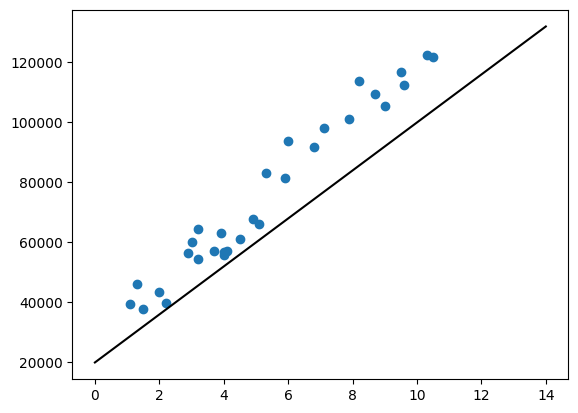

In [ ]:
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'])
x = np.arange(0, 15, 1)
y = theta1 * x + theta0
plt.plot(x, y, 'black');

# Hypothesis Function

In [ ]:
def hypothesis_func(list):
  hypothesized_data = [theta1 * x + theta0 for x in list]
  return hypothesized_data

hypothesis_func(train['YearsExperience'].tolist())

[62400.0,
 43200.0,
 37600.0,
 30400.0,
 45600.0,
 89600.0,
 60800.0,
 36000.0,
 96800.0,
 85600.0,
 74400.0,
 52000.0,
 28800.0,
 59200.0,
 45600.0,
 52800.0,
 51200.0,
 49600.0,
 83200.0,
 96000.0,
 52000.0]

In [ ]:
print(train['Salary'].tolist())
print(train['YearsExperience'].tolist())

[37731.0, 46205.0, 121872.0, 101302.0, 112635.0, 61111.0, 55794.0, 39891.0, 67938.0, 57081.0, 54445.0, 56642.0, 109431.0, 122391.0, 56957.0, 60150.0, 57189.0, 116969.0, 105582.0, 83088.0, 39343.0]
[1.5, 1.3, 10.5, 7.9, 9.6, 4.5, 4.0, 2.2, 4.9, 4.1, 3.2, 2.9, 8.7, 10.3, 4.0, 3.0, 3.7, 9.5, 9.0, 5.3, 1.1]


# Initial Log Loss

In [ ]:
print(np.log(loss(hypothesis_func(valid['YearsExperience'].tolist()), valid['Salary'].tolist())))

18.95469217589283


# Gradient Descent

In [ ]:
def gradient_1(list1, list2):
  if len(list1) != len(list2):
    return 'Length Error'
  else:
    i = 0
    change1 = []
    while i < len(list1):
      unit_change1 = (list1[i] - list2[i]) * list1[i]
      change1.append(unit_change1)
      i += 1
    gradient1 = st.mean(change1)
    return gradient1

def gradient_0(list1, list2):
  if len(list1) != len(list2):
    return 'Length Error'
  else:
    i = 0
    change0 = []
    while i < len(list1):
      unit_change0 = (list1[i] - list2[i])
      change0.append(unit_change0)
      i += 1
    gradient0 = st.mean(change0)
    return gradient0

# Normalizing Gradient Vector

In [ ]:
def normalize_grad(list):
  i = 0
  den = 0
  while i < len(list):
    den += (list[i]) ** 2
    i += 1
  normal_grad = [z / math.sqrt(den) for z in list]
  return normal_grad

normalize_grad([3, 4])

[0.6, 0.8]

# Training Epochs

In [ ]:
init_theta1, init_theta0 = 8000, 20000
theta1, theta0 = 8000, 20000

In [ ]:
epochs = 120000
lr = 0.1
counter = 0
for _ in range(epochs):
  gradient1 = gradient_1(hypothesis_func(train['YearsExperience'].tolist()), train['Salary'].tolist())
  gradient0 = gradient_0(hypothesis_func(train['YearsExperience'].tolist()), train['Salary'].tolist())
  gradient_vector = [gradient1, gradient0]
  gradient1, gradient0 = normalize_grad(gradient_vector)
  theta1 = theta1 - lr * gradient1
  theta0 = theta0 - lr * gradient0
  val_loss  = np.log(np.log(loss(hypothesis_func(valid['YearsExperience'].tolist()), valid['Salary'].tolist())))
  if counter % 10000 == 0:
    print(f'Iteration: {counter}, Val Loss: {round(val_loss, 3)} theta_1: {round(theta1, 3)}, theta_0: {round(theta0, 3)}, Gradient Vector: {gradient_vector}')
  counter += 1
print(f'Iteration: {counter}, Val Loss: {round(val_loss, 3)} theta_1: {round(theta1, 3)}, theta_0: {round(theta0, 3)}, Gradient Vector: {gradient_vector}')
print(f'Parameter Vector: [{round(theta1, 3)}, {round(theta0, 3)}]')

Iteration: 0, Val Loss: 2.942 theta_1: 8000.1, theta_0: 20000.0, Gradient Vector: [-824627123.8095238, -12613.190476190477]
Iteration: 10000, Val Loss: 2.872 theta_1: 9000.1, theta_0: 20000.015, Gradient Vector: [-529221229.5064428, -7775.080311836185]
Iteration: 20000, Val Loss: 2.782 theta_1: 10000.1, theta_0: 20000.03, Gradient Vector: [-173773125.40387517, -2936.9699002208113]
Iteration: 30000, Val Loss: 2.826 theta_1: 10418.485, theta_0: 20104.084, Gradient Vector: [-2172.8795532612576, -808.7357015142995]
Iteration: 40000, Val Loss: 2.824 theta_1: 10387.228, theta_0: 20288.552, Gradient Vector: [-2086.8160251442873, -775.4889839337427]
Iteration: 50000, Val Loss: 2.822 theta_1: 10356.051, theta_0: 20472.337, Gradient Vector: [-2001.224658481422, -742.5424091420284]
Iteration: 60000, Val Loss: 2.82 theta_1: 10324.952, theta_0: 20655.449, Gradient Vector: [-1916.1072687854369, -709.8922045824038]
Iteration: 70000, Val Loss: 2.819 theta_1: 10293.929, theta_0: 20837.9, Gradient Vecto

# Before and After Training

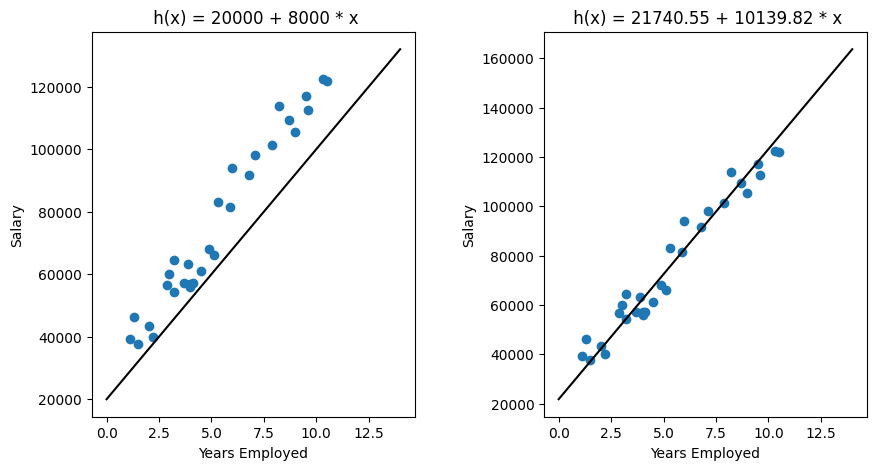

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.4)

ax1.scatter(salary_df['YearsExperience'], salary_df['Salary'])
x = np.arange(0, 15, 1)
y1 = init_theta1 * x + init_theta0
ax1.plot(x, y1, 'black')
ax1.set_xlabel('Years Employed')
ax1.set_ylabel('Salary')
ax1.title.set_text(f" h(x) = {init_theta0} + {init_theta1} * x")

ax2.scatter(salary_df['YearsExperience'], salary_df['Salary'])
x = np.arange(0, 15, 1)
y2 = theta1 * x + theta0
ax2.plot(x, y2, 'black');
ax2.set_xlabel('Years Employed')
ax2.set_ylabel('Salary')
ax2.title.set_text(f" h(x) = {round(theta0, 2)} + {round(theta1, 2)} * x");

In [ ]:
years = float(input('Enter years with company: '))
print(f"Salary is {round(theta1 * years + theta0, 2)}'")

Enter years with company: 5.7
Salary is 79382.19'


# Test Data

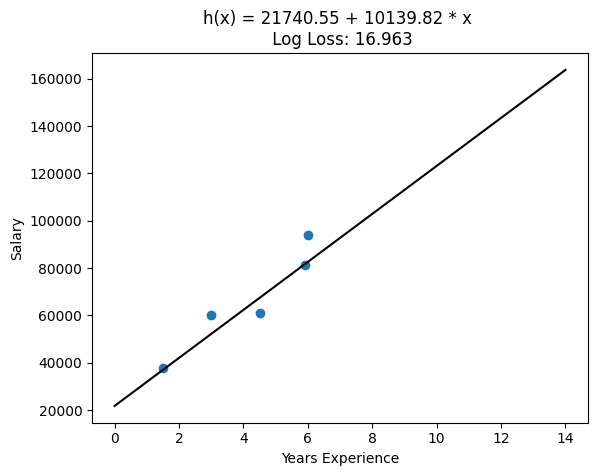

In [ ]:
plt.scatter(test['YearsExperience'], test['Salary'])
x = np.arange(0, 15, 1)
y = theta1 * x + theta0
plt.plot(x, y, 'black')
plt.title(f"h(x) = {round(theta0, 2)} + {round(theta1, 2)} * x \n Log Loss: {round(np.log(loss(hypothesis_func(test['YearsExperience'].tolist()), test['Salary'].tolist())), 3)}")
plt.xlabel('Years Experience')
plt.ylabel('Salary');